In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [7]:
import io
 
Lead_data = pd.read_csv(io.BytesIO(uploaded['Leads.csv']))
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
Lead_data.shape

(9240, 37)

In [10]:
# check for duplicate 
Lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()


0

In [11]:
Lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

Data Cleaning & Treatment

In [13]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [14]:
#Converting 'Select' values to NaN.

Lead_data = Lead_data.replace('Select', np.nan)

In [15]:
Lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [16]:
# Dropping unique valued columns
Lead_data= Lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [17]:
#checking null values in each rows

Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [18]:
# % of null value
round(100*(Lead_data.isnull().sum())/len(Lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [19]:
#dropping cols with more than 45% missing values

Lead_data = Lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)

In [20]:
Lead_data.shape

(9240, 23)

In [21]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [22]:
Lead_data['Specialization'] = Lead_data['Specialization'].fillna('not provided')
Lead_data['City'] = Lead_data['City'].fillna('not provided')
Lead_data['Tags'] = Lead_data['Tags'].fillna('not provided')
Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].fillna('not provided')
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].fillna('not provided')
Lead_data['Country'] = Lead_data['Country'].fillna('not provided')
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [23]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [24]:
Lead_data.shape

(9240, 23)

In [25]:
Lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [26]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Lead_data['Country'] = Lead_data.apply(lambda x:slots(x['Country']), axis = 1)
Lead_data['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [27]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

Lead_data['Country'] = Lead_data['Country'].replace('not provided','India')
Lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [28]:
# Checking the percent of lose if the null values are removed
round(100*(sum(Lead_data.isnull().sum(axis=1) > 1)/Lead_data.shape[0]),2)

1.48

In [29]:
Lead_data = Lead_data[Lead_data.isnull().sum(axis=1) <1]


In [30]:
# Rechecking the percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [31]:
Lead_data.shape

(9074, 23)

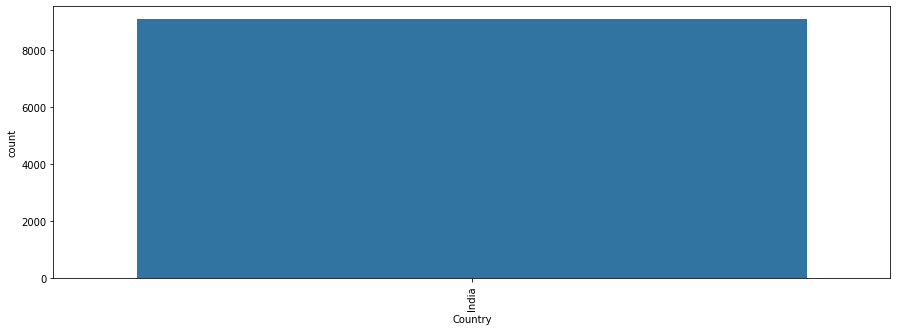

In [52]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data.Country, x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [53]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [55]:
#checking value counts of "City" column

Lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [59]:
Lead_data['City'] = Lead_data['City'].replace(np.nan,'Mumbai')

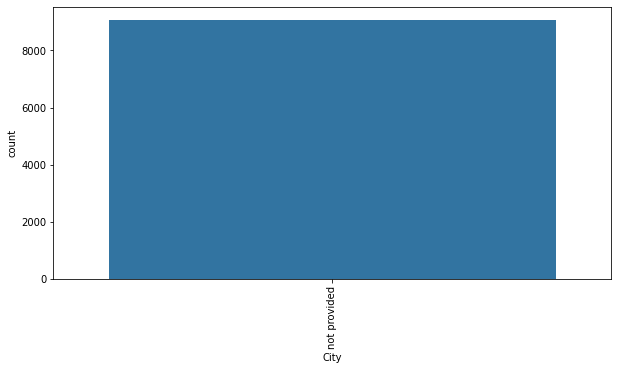

In [62]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_data.City, x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
#checking value counts of Specialization column

Lead_data['Specialization'].value_counts(dropna=False)

not provided                         3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [65]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan, 'Not Specified')

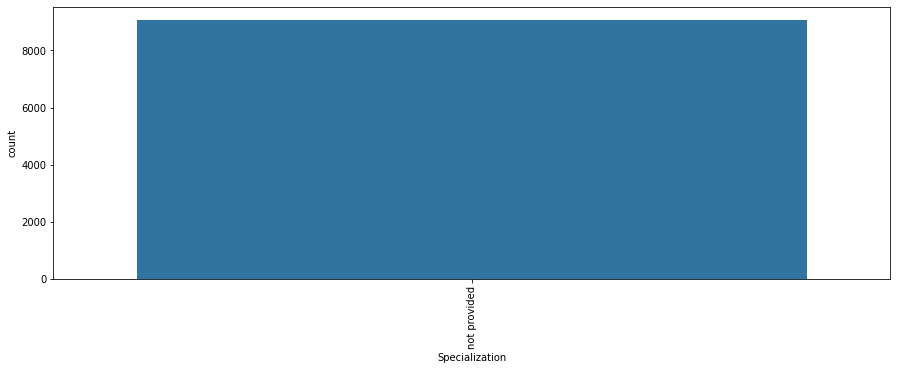

In [66]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data.Specialization, x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [67]:
#combining Management Specializations because they show similar trends

Lead_data['Specialization'] = Lead_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

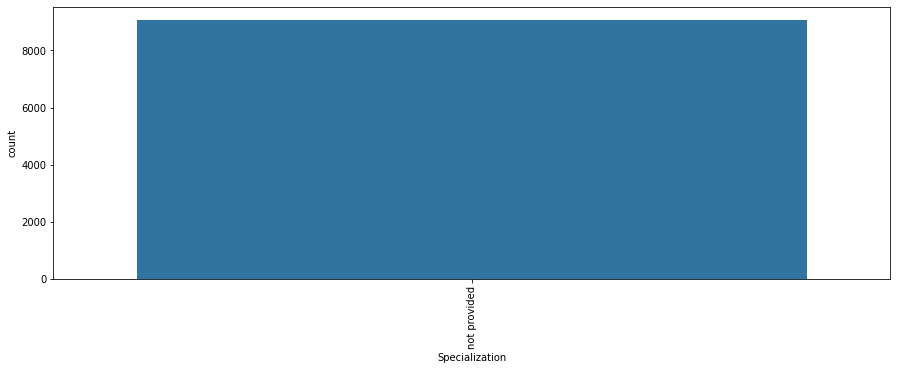

In [69]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data.Specialization, x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [70]:
#What is your current occupation

Lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
not provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [71]:
#imputing Nan values with mode "Unemployed"

Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [72]:
#checking count of values
Lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
not provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

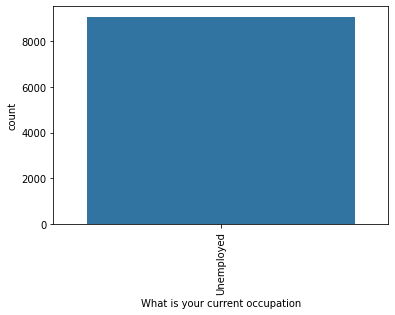

In [73]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(Lead_data['What is your current occupation'], x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [74]:
#checking value counts

Lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6370
not provided                 2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [77]:
#replacing Nan values with Mode "Better Career Prospects"

Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

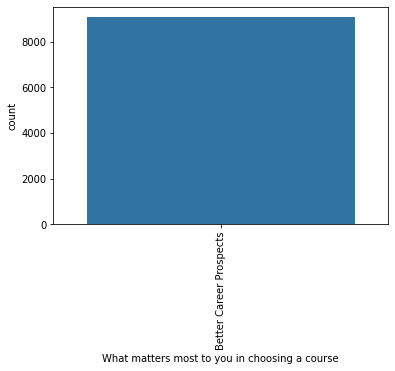

In [78]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(Lead_data['What matters most to you in choosing a course'], x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [79]:
#checking value counts of variable
Lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6370
not provided                 2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [80]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [81]:
#checking value counts of Tag variable
Lead_data['Tags'].value_counts(dropna=False)

not provided                                         3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [82]:
#replacing Nan values with "Not Specified"
Lead_data['Tags'] = Lead_data['Tags'].replace(np.nan,'Not Specified')

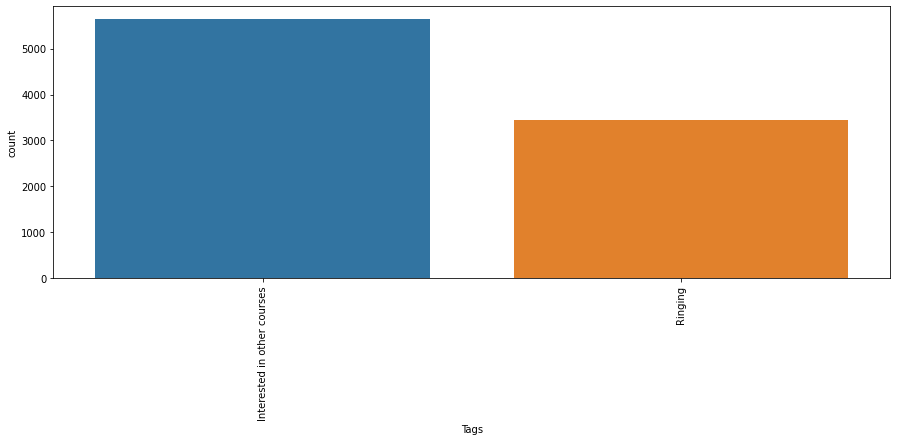

In [84]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data['Tags'], x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [85]:
#replacing tags with low frequency with "Other Tags"
Lead_data['Tags'] = Lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [86]:

Lead_data['Tags'] = Lead_data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [87]:
#checking percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [88]:
#checking value counts of Lead Source column

Lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [89]:
#replacing Nan Values and combining low frequency values
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(np.nan,'Others')
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace('google','Google')
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace('Facebook','Social Media')
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                 

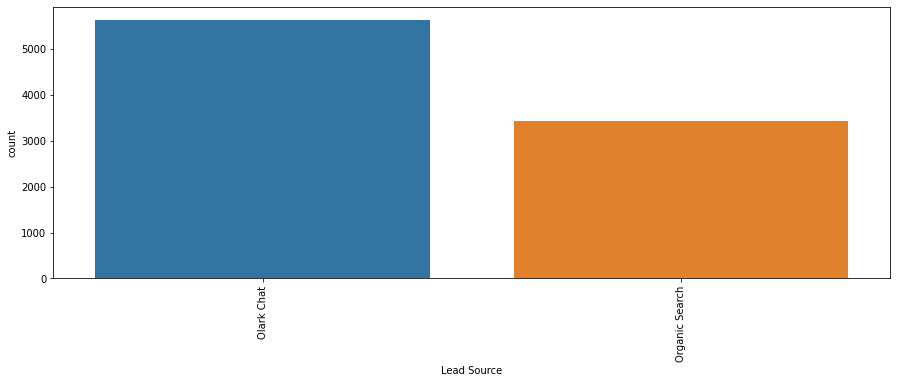

In [91]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data['Lead Source'], x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [92]:
# Last Activity:

Lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [93]:
#replacing Nan Values and combining low frequency values

Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(np.nan,'Others')
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [94]:
# Last Activity:

Lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [95]:
#Check the Null Values in All Columns:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [96]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
Lead_data = Lead_data.dropna()

In [97]:
#Checking percentage of Null Values in All Columns:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [98]:
#Lead Origin
Lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

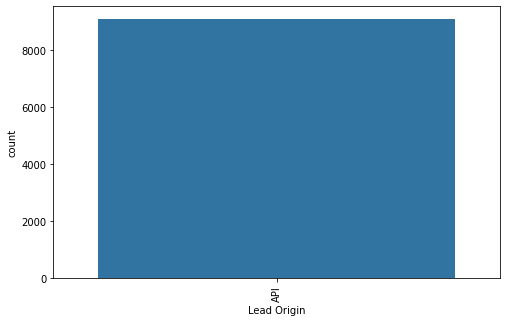

In [99]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(Lead_data['Lead Origin'], x=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

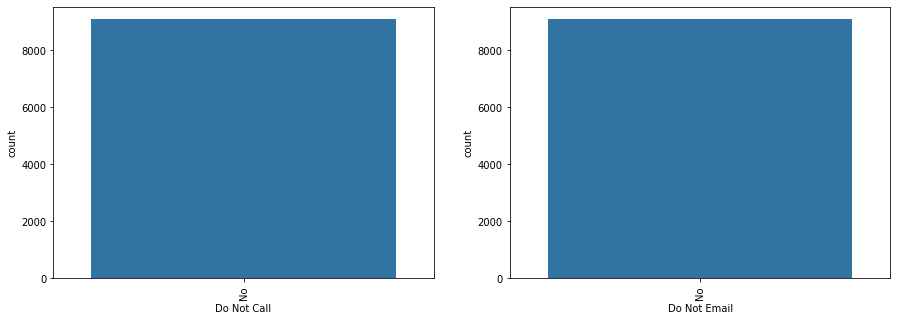

In [100]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(Lead_data['Do Not Call'], x=Lead_data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(Lead_data['Do Not Email'], x=Lead_data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [101]:
#checking value counts for Do Not Call
Lead_data['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [103]:
#checking value counts for Do Not Email
Lead_data['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [104]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [105]:
Lead_data.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [107]:
Lead_data['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [108]:
Lead_data['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [109]:
Lead_data['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [110]:
Lead_data['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [111]:
Lead_data['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [116]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [117]:
#checking value counts of last Notable Activity
Lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [118]:
#clubbing lower frequency values

Lead_data['Last Notable Activity'] = Lead_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

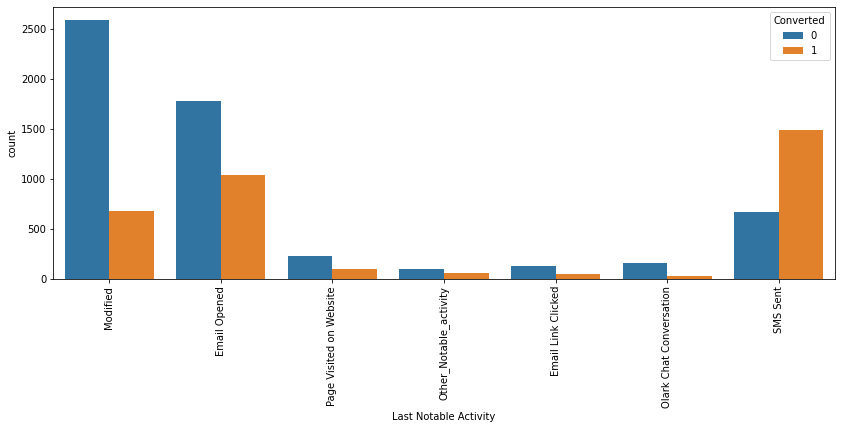

In [119]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [120]:
#checking value counts for variable

Lead_data['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      158
Name: Last Notable Activity, dtype: int64

In [121]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [125]:
#dropping columns

Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [126]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.85541106458012

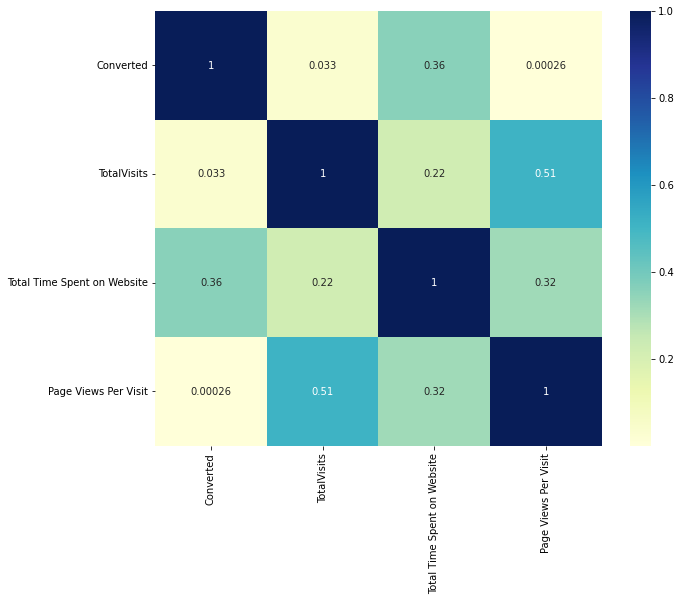

In [127]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(Lead_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

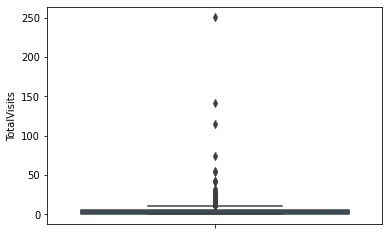

In [128]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

In [129]:
#checking percentile values for "Total Visits"

Lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

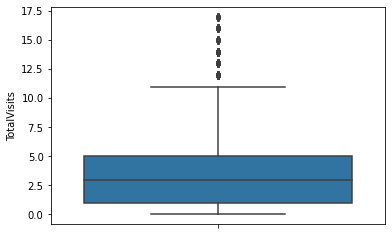

In [130]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_data.TotalVisits.quantile(0.99)
leads = Lead_data[(Lead_data.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [131]:
Lead_data.shape

(9074, 23)

In [132]:
#checking percentiles for "Total Time Spent on Website"

Lead_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

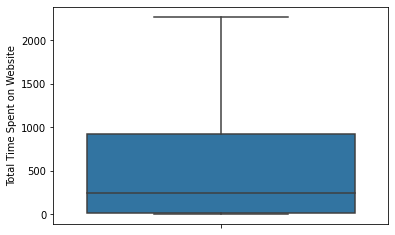

In [133]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_data['Total Time Spent on Website'])
plt.show()

In [134]:
#checking spread of "Page Views Per Visit"

Lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

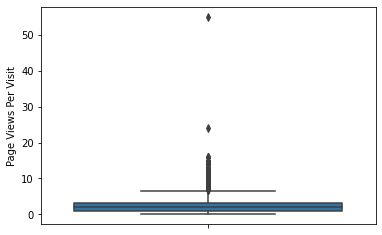

In [135]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()

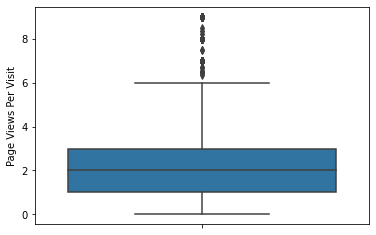

In [136]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = Lead_data['Page Views Per Visit'].quantile(0.99)
Lead_data = Lead_data[Lead_data['Page Views Per Visit'] <= Q3]
Q1 = Lead_data['Page Views Per Visit'].quantile(0.01)
Lead_data = Lead_data[Lead_data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()

In [137]:
Lead_data.shape

(8999, 23)

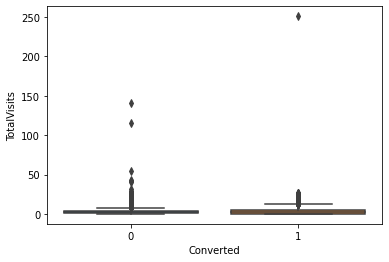

In [138]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_data)
plt.show()

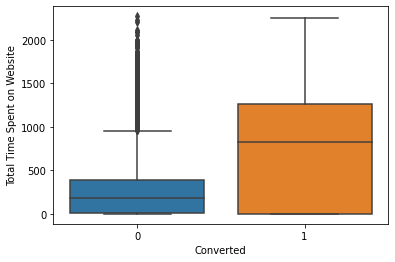

In [139]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=Lead_data.Converted, y=Lead_data['Total Time Spent on Website'])
plt.show()


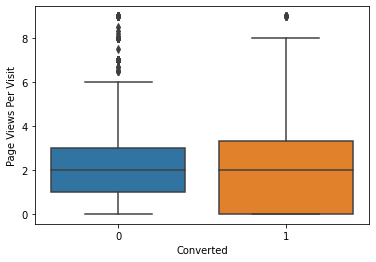

In [140]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=Lead_data.Converted,y=Lead_data['Page Views Per Visit'])
plt.show()

In [141]:
#checking missing values in leftover columns/

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [142]:
#getting a list of categorical columns

cat_cols= Lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [143]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

In [144]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(Lead_data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

Lead_data = pd.concat([Lead_data,dummy],1)

In [146]:
dummy = pd.get_dummies(Lead_data['Specialization'], prefix  = 'Specialization')
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [147]:
dummy = pd.get_dummies(Lead_data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [148]:
dummy = pd.get_dummies(Lead_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [149]:
dummy = pd.get_dummies(Lead_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [152]:
dummy = pd.get_dummies(Lead_data['Tags'], prefix  = 'Tags')
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [153]:
#dropping the original columns after dummy variable creation

Lead_data.drop(cat_cols,1,inplace = True)

In [154]:
Lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [155]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = Lead_data['Converted']

y.head()

X=Lead_data.drop('Converted', axis=1)

In [156]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [157]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 4739 to 5800
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6299 non-null   float64
 1   Total Time Spent on Website                           6299 non-null   int64  
 2   Page Views Per Visit                                  6299 non-null   float64
 3   Lead Origin_Landing Page Submission                   6299 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6299 non-null   uint8  
 5   Lead Origin_Lead Import                               6299 non-null   uint8  
 6   What is your current occupation_Housewife             6299 non-null   uint8  
 7   What is your current occupation_Other                 6299 non-null   uint8  
 8   What is your current occupation_Student               6

In [158]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided
4739,-0.270741,-0.390877,-0.151104,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5809,-0.076725,-0.741181,0.374519,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
903,0.117290,-0.858561,0.900142,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7777,-0.658771,-0.880569,-1.202350,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7905,0.893351,2.514263,3.002633,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [159]:
import statsmodels.api as sm

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE


In [163]:
rfe = RFE(logreg)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [164]:
rfe.support_

array([False,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [165]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What is your current occupation_not provided', True, 1),
 ('City_Other Cities', False, 29),
 ('City_Other Cities of Maharashtra', False, 21),
 ('City_Other Metro Cities', False, 24),
 ('City_Thane & Outskirts', False, 17),
 ('City_Tier II Cities', False, 20),
 ('City_not provided', False, 10),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 31),
 ('

In [166]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
    

In [167]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'City_not provided',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence', 'Specialization_not provided',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Notable Activity_Email Opened',
      

In [168]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.6
Date:                Sun, 19 Mar 2023   Deviance:                       2087.2
Time:                        14:21:23   Pearson chi2:                 7.14e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6302
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3618      0.540     -0.670      0.503      -1.421       0.697
Total Time Spent on Website                              1.0152      0.067     15.254      0.000       0.885       1.146
Lead Origin_Landing Page Submission                     -0.4130      0.165     -2.501      0.012      -0.737      -0.089
Lead Origin_Lead Add Form                                1.5957      0.529      3.018      0.003       0.560       2.632
What is your current occupation_Housewife               22.6221    6.8e+04      0.000      1.000   -1.33e+05    1.33e+05
What is your current occupation_Other                    1.3252      1.699      0.780      0.435      -2.005       4.656
What is your current occupation_Unemployed               0.8046      0.509      1.581      0.114      -0.193       1.802
What is your current occupation_Working Professional     1.4514      0.612      2.370      0.018       0.251       2.651
What is your current occupation_not provided            -1.6774      0.526     -3.186      0.001      -2.709      -0.646
Specialization_Rural and Agribusiness                   -0.7839      0.833     -0.941      0.347      -2.417       0.849
Specialization_Travel and Tourism                       -0.7768      0.436     -1.780      0.075      -1.632       0.078
Lead Source_Direct Traffic                              -0.2904      0.160     -1.817      0.069      -0.604       0.023
Lead Source_Olark Chat                                   0.7896      0.190      4.159      0.000       0.417       1.162
Lead Source_Social Media                                -0.5695      0.693     -0.822      0.411      -1.928       0.789
Lead Source_Welingak Website                             2.5530      1.145      2.230      0.026       0.309       4.797
Last Activity_Converted to Lead                         -1.0851      0.426     -2.547      0.011      -1.920      -0.250
Last Activity_Email Bounced                             -1.4997      0.505     -2.971      0.003      -2.489      -0.510
Last Activity_Olark Chat Conversation                   -0.7871      0.330     -2.386      0.017      -1.434      -0.141
Last Activity_Page Visited on Website                   -0.4073      0.266     -1.533      0.125      -0.928       0.114
Last Activity_SMS Sent                                   1.1775      0.285      4.126      0.000       0.618       1.737
Last Notable Activity_Email Link Clicked                -1.1156      0.489     -2.281      0.023      -2.074      -0.157
Last Notable Activity_Modified                          -0.9086      0.216     -4.213      0.000      -1.331      -0.486
Last Notable Activity_Olark Chat Conversation           -1

In [170]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.6
Date:                Sun, 19 Mar 2023   Deviance:                       2087.2
Time:                        14:21:44   Pearson chi2:                 7.14e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6302
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3618      0.540     -0.670      0.503      -1.421       0.697
Total Time Spent on Website                              1.0152      0.067     15.254      0.000       0.885       1.146
Lead Origin_Landing Page Submission                     -0.4130      0.165     -2.501      0.012      -0.737      -0.089
Lead Origin_Lead Add Form                                1.5957      0.529      3.018      0.003       0.560       2.632
What is your current occupation_Housewife               22.6221    6.8e+04      0.000      1.000   -1.33e+05    1.33e+05
What is your current occupation_Other                    1.3252      1.699      0.780      0.435      -2.005       4.656
What is your current occupation_Unemployed               0.8046      0.509      1.581      0.114      -0.193       1.802
What is your current occupation_Working Professional     1.4514      0.612      2.370      0.018       0.251       2.651
What is your current occupation_not provided            -1.6774      0.526     -3.186      0.001      -2.709      -0.646
Specialization_Rural and Agribusiness                   -0.7839      0.833     -0.941      0.347      -2.417       0.849
Specialization_Travel and Tourism                       -0.7768      0.436     -1.780      0.075      -1.632       0.078
Lead Source_Direct Traffic                              -0.2904      0.160     -1.817      0.069      -0.604       0.023
Lead Source_Olark Chat                                   0.7896      0.190      4.159      0.000       0.417       1.162
Lead Source_Social Media                                -0.5695      0.693     -0.822      0.411      -1.928       0.789
Lead Source_Welingak Website                             2.5530      1.145      2.230      0.026       0.309       4.797
Last Activity_Converted to Lead                         -1.0851      0.426     -2.547      0.011      -1.920      -0.250
Last Activity_Email Bounced                             -1.4997      0.505     -2.971      0.003      -2.489      -0.510
Last Activity_Olark Chat Conversation                   -0.7871      0.330     -2.386      0.017      -1.434      -0.141
Last Activity_Page Visited on Website                   -0.4073      0.266     -1.533      0.125      -0.928       0.114
Last Activity_SMS Sent                                   1.1775      0.285      4.126      0.000       0.618       1.737
Last Notable Activity_Email Link Clicked                -1.1156      0.489     -2.281      0.023      -2.074      -0.157
Last Notable Activity_Modified                          -0.9086      0.216     -4.213      0.000      -1.331      -0.486
Last Notable Activity_Olark Chat Conversation           -1

In [171]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,8.37
18,Last Activity_SMS Sent,7.39
22,Last Notable Activity_SMS Sent,7.23
1,Lead Origin_Landing Page Submission,4.53
20,Last Notable Activity_Modified,3.91
29,Tags_Will revert after reading the email,3.65
7,What is your current occupation_not provided,2.73
27,Tags_Other_Tags,2.63
28,Tags_Ringing,2.54
16,Last Activity_Olark Chat Conversation,2.43


In [173]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [174]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1049.0
Date:                Sun, 19 Mar 2023   Deviance:                       2098.0
Time:                        14:22:16   Pearson chi2:                 7.89e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6296
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2596      0.545     -0.476      0.634      -1.328       0.809
Total Time Spent on Website                              1.0124      0.066     15.309      0.000       0.883       1.142
Lead Origin_Landing Page Submission                     -0.4120      0.164     -2.513      0.012      -0.733      -0.091
Lead Origin_Lead Add Form                                1.5580      0.537      2.901      0.004       0.506       2.610
What is your current occupation_Housewife               22.4854   6.79e+04      0.000      1.000   -1.33e+05    1.33e+05
What is your current occupation_Other                    1.4946      1.740      0.859      0.390      -1.916       4.905
What is your current occupation_Unemployed               0.7705      0.515      1.496      0.135      -0.239       1.780
What is your current occupation_Working Professional     1.4071      0.618      2.278      0.023       0.197       2.618
What is your current occupation_not provided            -1.7265      0.533     -3.240      0.001      -2.771      -0.682
Specialization_Rural and Agribusiness                   -0.8407      0.816     -1.031      0.303      -2.439       0.758
Specialization_Travel and Tourism                       -0.7704      0.434     -1.775      0.076      -1.621       0.080
Lead Source_Direct Traffic                              -0.2971      0.159     -1.872      0.061      -0.608       0.014
Lead Source_Olark Chat                                   0.7900      0.189      4.180      0.000       0.420       1.160
Lead Source_Social Media                                -0.6966      0.689     -1.011      0.312      -2.047       0.654
Lead Source_Welingak Website                             2.5529      1.149      2.221      0.026       0.300       4.805
Last Activity_Converted to Lead                         -0.6747      0.412     -1.636      0.102      -1.483       0.134
Last Activity_Email Bounced                             -1.3260      0.503     -2.635      0.008      -2.312      -0.340
Last Activity_Olark Chat Conversation                   -0.3532      0.309     -1.142      0.253      -0.959       0.253
Last Activity_Page Visited on Website                   -0.2964      0.262     -1.129      0.259      -0.811       0.218
Last Activity_SMS Sent                                   2.0043      0.139     14.375      0.000       1.731       2.278
Last Notable Activity_Email Link Clicked                -1.2051      0.493     -2.446      0.014      -2.171      -0.239
Last Notable Activity_Modified                          -1.4217      0.158     -8.988      0.000      -1.732      -1.112
Last Notable Activity_Olark Chat Conversation           -2

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,8.30
1,Lead Origin_Landing Page Submission,4.53
28,Tags_Will revert after reading the email,3.64
7,What is your current occupation_not provided,2.72
20,Last Notable Activity_Modified,2.71
26,Tags_Other_Tags,2.63
27,Tags_Ringing,2.54
11,Lead Source_Olark Chat,2.39
16,Last Activity_Olark Chat Conversation,2.21
6,What is your current occupation_Working Profes...,2.21


In [176]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4739    0.952137
5809    0.041152
903     0.009112
7777    0.004122
7905    0.343406
1215    0.181675
987     0.030453
1478    0.006585
110     0.976234
4640    0.016420
dtype: float64

In [177]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.95213706, 0.04115246, 0.00911204, 0.00412187, 0.34340635,
       0.1816747 , 0.03045273, 0.00658531, 0.97623437, 0.01641988])

In [178]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.952137,4739
1,0,0.041152,5809
2,0,0.009112,903
3,0,0.004122,7777
4,0,0.343406,7905


In [179]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.952137,4739,1
1,0,0.041152,5809,0
2,0,0.009112,903,0
3,0,0.004122,7777,0
4,0,0.343406,7905,0


In [180]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3779  139]
 [ 236 2145]]


In [181]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9404667407525004


In [182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9008819823603528

In [184]:
# Let us calculate specificity
TN / float(TN+FP)

0.9645227156712608

In [185]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03547728432873915


In [186]:
# positive predictive value 
print (TP / float(TP+FP))

0.9391418563922942


In [187]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9412204234122042


In [189]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

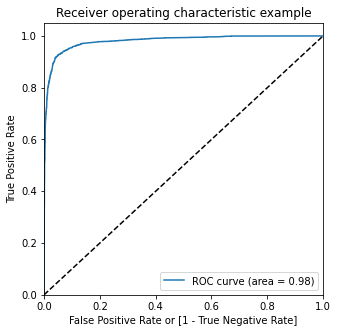

In [191]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [192]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.952137,4739,1,1,1,1,1,1,1,1,1,1,1
1,0,0.041152,5809,0,1,0,0,0,0,0,0,0,0,0
2,0,0.009112,903,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004122,7777,0,1,0,0,0,0,0,0,0,0,0
4,0,0.343406,7905,0,1,1,1,1,0,0,0,0,0,0


In [193]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377997  1.000000  0.000000
0.1   0.1  0.875695  0.976480  0.814446
0.2   0.2  0.921257  0.954221  0.901225
0.3   0.3  0.934752  0.936581  0.933640
0.4   0.4  0.940943  0.923982  0.951251
0.5   0.5  0.940467  0.900882  0.964523
0.6   0.6  0.937292  0.884922  0.969117
0.7   0.7  0.928401  0.847123  0.977795
0.8   0.8  0.918876  0.811424  0.984176
0.9   0.9  0.903318  0.761445  0.989535


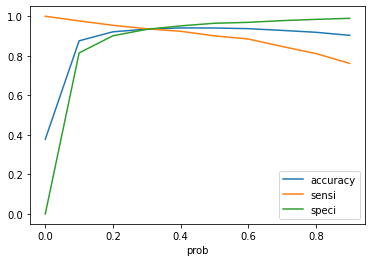

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [195]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.952137,4739,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.041152,5809,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.009112,903,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004122,7777,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.343406,7905,0,1,1,1,1,0,0,0,0,0,0,1


In [196]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.952137,4739,1,95
1,0,0.041152,5809,0,4
2,0,0.009112,903,0,1
3,0,0.004122,7777,0,0
4,0,0.343406,7905,1,34


In [197]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9347515478647405

In [198]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3658,  260],
       [ 151, 2230]])

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9365812683746325

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.9336396120469628

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.29%
Sensitivity : 91.70%
Specificity : 92.66%

In [202]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06636038795303727


In [203]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8955823293172691


In [204]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9603570490942505


In [205]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3658,  260],
       [ 151, 2230]])

In [206]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8955823293172691

In [207]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9365812683746325

In [208]:
from sklearn.metrics import precision_score, recall_score

In [209]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8955823293172691

In [210]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9365812683746325

In [211]:
from sklearn.metrics import precision_recall_curve

In [212]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

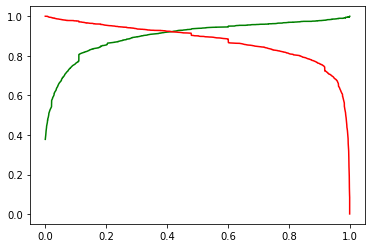

In [213]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [214]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_not provided
9124,-0.380843,-0.398118,-0.680297,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4392,-0.967758,-0.887468,-1.211072,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4072,-0.380843,-0.675907,-0.149523,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5551,-0.967758,-0.887468,-1.211072,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2778,-0.087385,0.146422,0.381251,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [215]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Specialization_Rural and Agribusiness,Specialization_Travel and Tourism,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9124,-0.398118,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4392,-0.887468,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4072,-0.675907,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5551,-0.887468,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2778,0.146422,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [216]:
X_test_sm = sm.add_constant(X_test)

In [217]:
y_test_pred = res.predict(X_test_sm)

In [218]:
y_test_pred[:10]

9124    0.141050
4392    0.011097
4072    0.003279
5551    0.962621
2778    0.013054
4193    0.003574
8752    0.002113
1635    0.000408
7652    0.999395
4766    0.479783
dtype: float64

In [219]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [220]:
# Let's see the head
y_pred_1.head()

,0
9124,0.141050
4392,0.011097
4072,0.003279
5551,0.962621
2778,0.013054


In [221]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [222]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [223]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [224]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [225]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,9124,0.141050
1,0,4392,0.011097
2,0,4072,0.003279
3,1,5551,0.962621
4,0,2778,0.013054


In [226]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [227]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,9124,0.141050
1,0,4392,0.011097
2,0,4072,0.003279
3,1,5551,0.962621
4,0,2778,0.013054


In [228]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [229]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,9124,0,0.141050,14
1,4392,0,0.011097,1
2,4072,0,0.003279,0
3,5551,1,0.962621,96
4,2778,0,0.013054,1


In [230]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [231]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,9124,0,0.141050,14,0
1,4392,0,0.011097,1,0
2,4072,0,0.003279,0,0
3,5551,1,0.962621,96,1
4,2778,0,0.013054,1,0


In [232]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9307407407407408

In [233]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1556,  123],
       [  64,  957]])

In [234]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [235]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9373163565132223

In [236]:
# Let us calculate specificity
TN / float(TN+FP)

0.9267421083978559

In [237]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8861111111111111

In [238]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9373163565132223

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%
Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 92.29%
Sensitivity : 91.70%
Specificity : 92.66%
Test Data: 
Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

 